<a href="https://colab.research.google.com/github/aayush1036/ml_course/blob/main/Python/support_vector_regression/svr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
dataset = pd.read_csv('Position_Salaries.csv') #reading the dataset 
X = dataset.iloc[:, 1:-1].values #getting the required columns 
y = dataset.iloc[:,-1].values #getting the target column

In [12]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [13]:
y = y.reshape((len(y),1)) #reshaping the target column into a column vector 

In [14]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [15]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

#standardizing x&y 

In [16]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [17]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [19]:
from sklearn.svm import SVR #importing the support vector regressor 
regressor = SVR(kernel='rbf') #defining a regressor with rbf kernel
regressor.fit(X,y) #fitting our data to the regressor 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [21]:
#predicting new values
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]]))) 
#predicting new values 
#standardizing our desired point according to the mean and stdev of dataset 
#then predicting it according to t5he model
#then destandardizing the standardized output according to the mean and stdev of target column

array([170370.0204065])

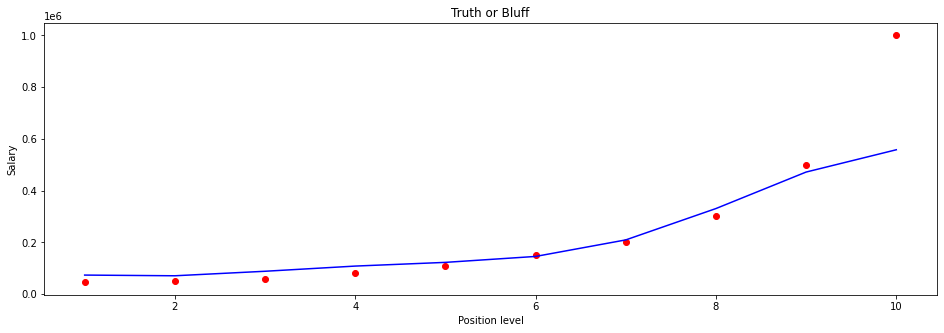

In [26]:
fig, ax = plt.subplots(figsize=(16,5))
ax.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
ax.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color='blue')
ax.set_title('Truth or Bluff')
ax.set_xlabel('Position level')
ax.set_ylabel('Salary');

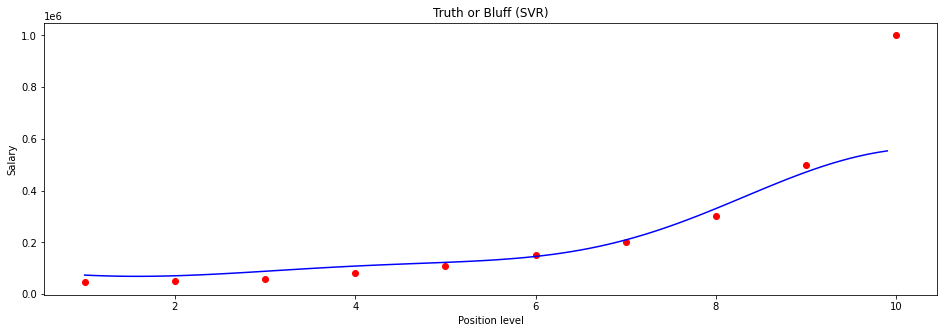

In [29]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
#creating more points
X_grid = X_grid.reshape((len(X_grid), 1))
#reshaping them into column vectors 
fig,ax = plt.subplots(figsize=(16,5))
ax.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
ax.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
ax.set_title('Truth or Bluff (SVR)')
ax.set_xlabel('Position level')
ax.set_ylabel('Salary');